<a href="https://colab.research.google.com/github/maab2198/heart/blob/master/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning (Classification)

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network  import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from matplotlib.ticker import NullFormatter


from sklearn.neural_network  import MLPClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score,confusion_matrix

    

In [0]:
#!pip install ipympl
#!jupyter labextension install jupyter-matplotlib
#%matplotlib widget

In [0]:

df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


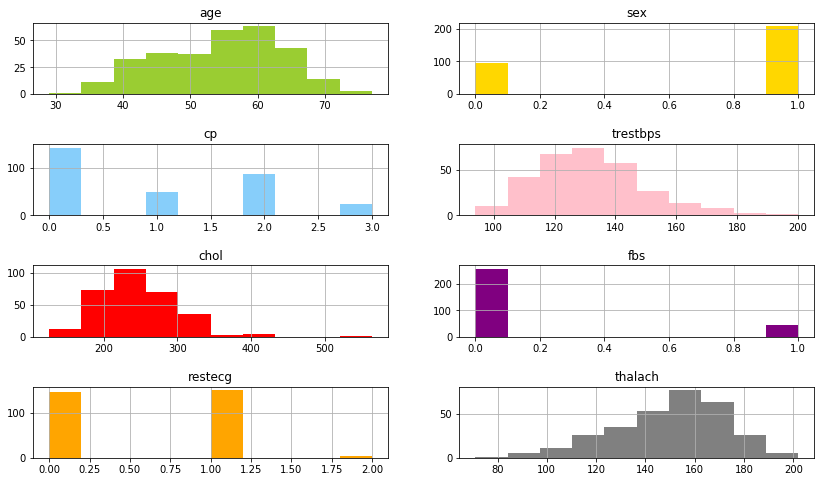

In [0]:
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    df[df.columns[2*i]].hist(color=color[2*i])
    plt.title(df.columns[2*i])
    plt.subplot2grid((4,2),(i,1))
    df[df.columns[2*i+1]].hist(color=color[2*i+1])
    plt.title(df.columns[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

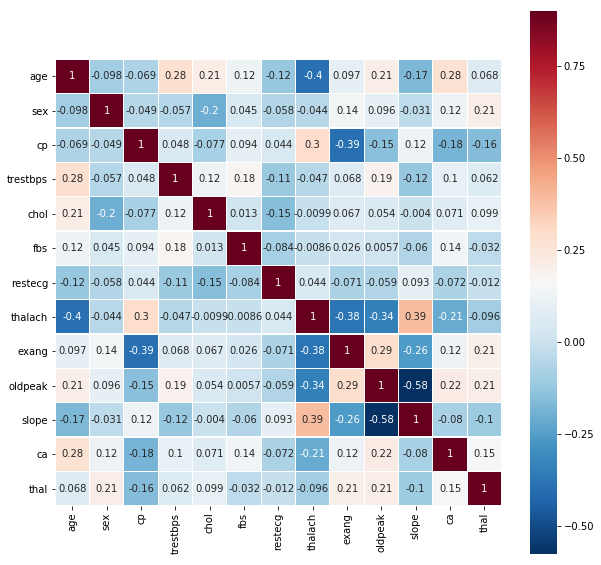

In [0]:
plt.subplots(figsize = (10,10))
sns.heatmap(df.iloc[:, :-1].corr(), 
                annot=True,
                cmap = 'RdBu_r',
                linewidths=0.1, 
                linecolor='white',
                vmax = .9,
                square=True)
plt.show()

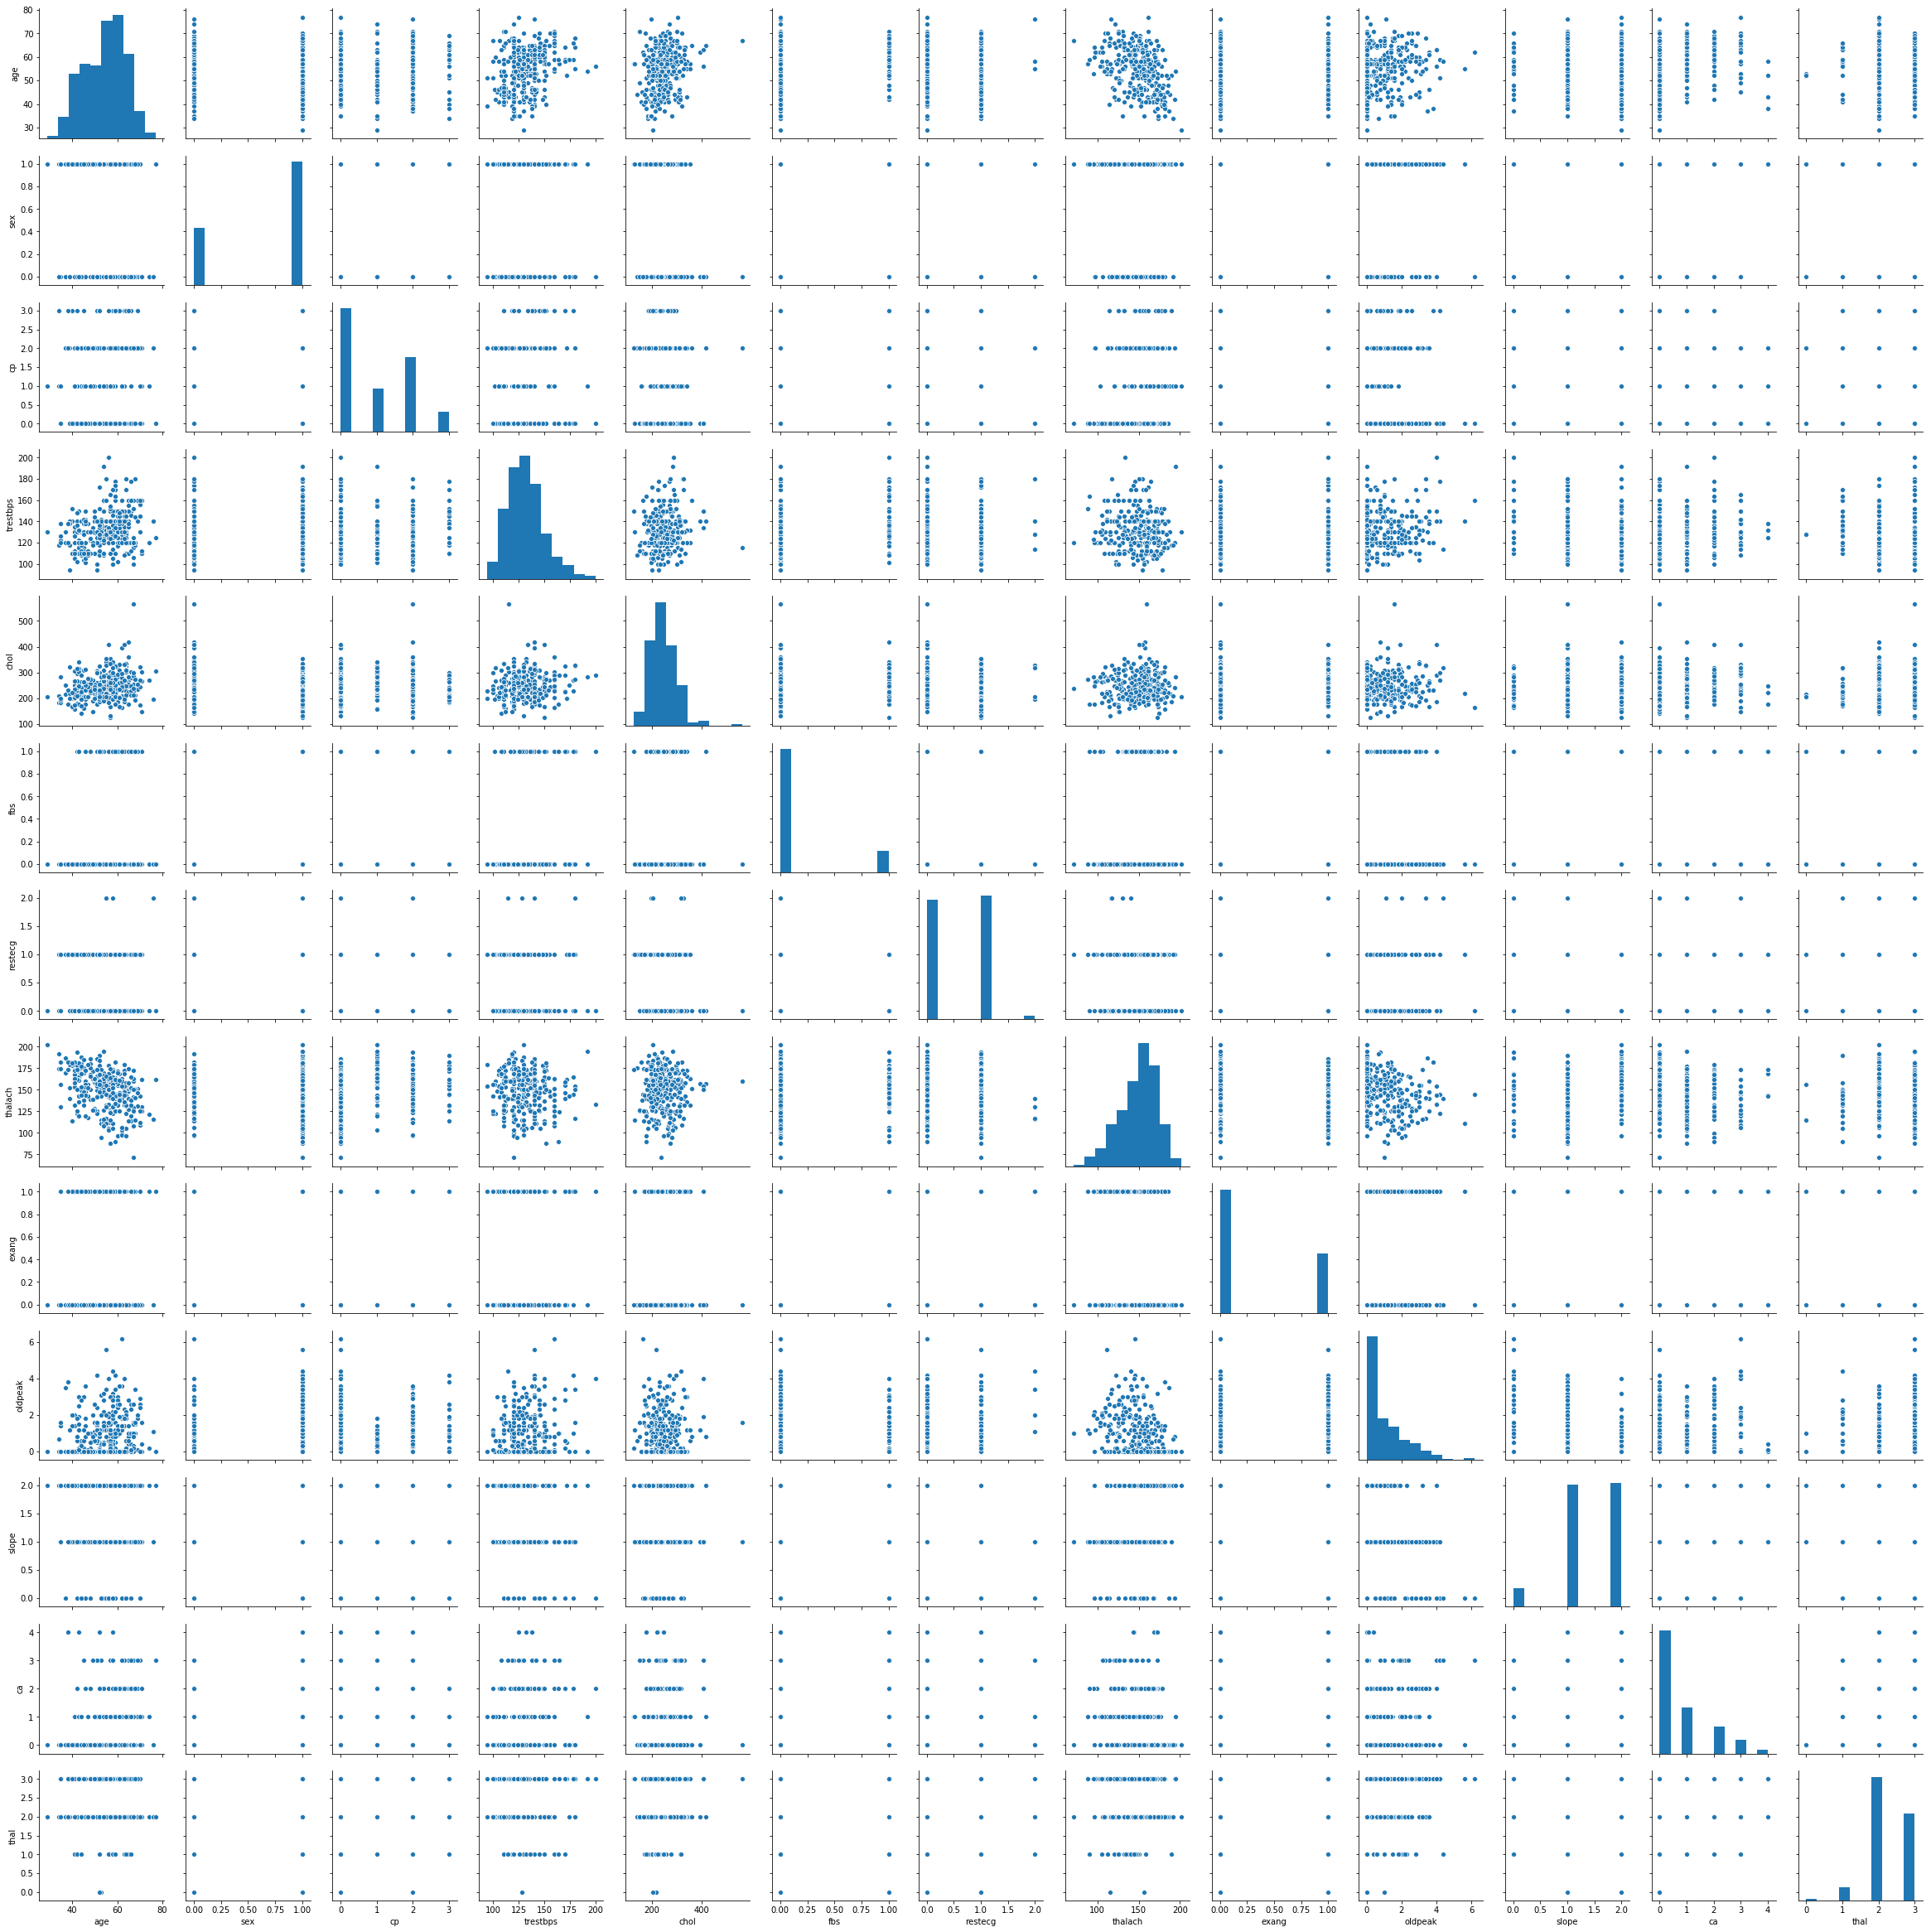

In [0]:
sns.pairplot(df.iloc[:, :-1])
plt.show()

In [0]:
train, test = train_test_split(df, test_size=0.1)
x_train = train.iloc[:, :-1].values
x_test = test.iloc[:, :-1].values

y_train = train.iloc[:, -1].values
y_train[y_train == 2] = -1

y_test = test.iloc[:,-1].values
y_test[y_test == 2] = -1
train.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1


In [0]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
print("KNN: ", knn.score(x_test, y_test))


KNN:  0.6451612903225806


In [0]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
print("SVM ", svm.score(x_test, y_test))

SVC  0.41935483870967744


In [0]:
from sklearn.naive_bayes import GaussianNB
    
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)

0.7096774193548387

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6774193548387096

In [0]:
class OwnGaussianNB:
    def __init__(self):
        self.__summaries = None
        self.__classes = None

    def fit(self, x_train, y_train):
        class_data = self.__separate_to_classes(x_train, y_train)
        self.__classes = class_data.keys()
        self.__summaries = {
            item: self.__summary(class_data[item]) for item in self.__classes
        }

    def score(self, x_test, y_test):
        wrong_num = 0
        for i in range(len(y_test)):
            predicted_classes = self.predict(x_test[i], y_test[i])
            if y_test[i] != max(predicted_classes, key=predicted_classes.get):
                wrong_num += 1
        wrong_perc = wrong_num / (len(y_test))
        acc = 1 - wrong_perc
        return acc

    def predict(self, x, y):
        probability = {key: 0 for key in self.__classes}
        for item in self.__summaries.keys():
            mean, stdev = self.__summaries[item]['means'], self.__summaries[item]['stds']
            prob = self.__calculate_probability(x, mean, stdev)
            probability[item] = prob
        return probability

    @staticmethod
    def __calculate_probability(x, mean, stdev):
        prob = 1
        for j in range(len(x)):
            exponent = np.exp(-((x[j] - mean[j]) ** 2 / (2 * stdev[j] ** 2)))
            prob *= (1 / (np.sqrt(2 * np.pi) * stdev[j])) * exponent
        return prob

    @staticmethod
    def __separate_to_classes(x_train, y_train):
        return {
            cls: [x_train[i] for i in range(len(x_train)) if y_train[i] == cls]
            for cls in np.unique(y_train)
        }

    @staticmethod
    def __summary(x):
        return {
            'means': np.mean(x, axis=0),
            'stds': np.std(x, axis=0)
        }

In [0]:
own_gnb = OwnGaussianNB()
own_gnb.fit(x_train, y_train)
own_gnb.score(x_test, y_test)

0.7096774193548387

##2. Unsupervised methods




In [0]:
pca = PCA(n_components=3)
# pdf = pca.fit_transform(df.iloc[:,:-1].values)
# pca = PCA(n_components=3)
X = df.iloc[:,:-1].values
pdf = pca.fit_transform(X)

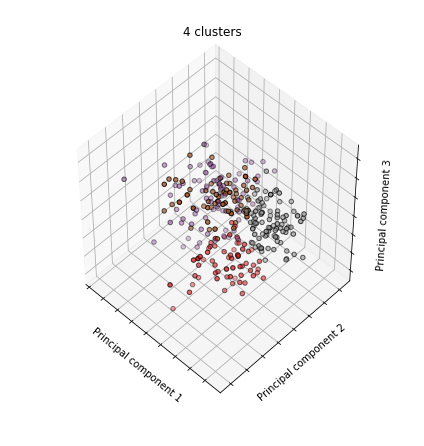

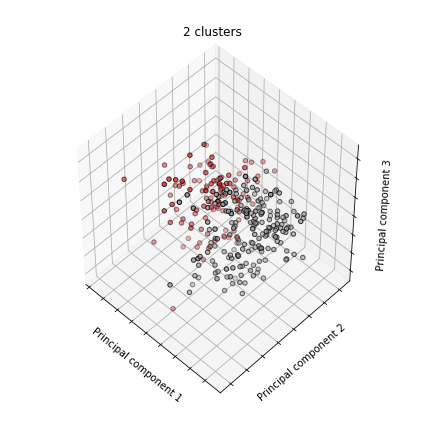

In [0]:
estimators = [('k_means_4', KMeans(n_clusters=4)),
              ('k_means_2', KMeans(n_clusters=2))]

fignum = 1
titles = ['4 clusters', '2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(pdf)
    labels = est.labels_
    ax.scatter(pdf[:, 0], pdf[:, 1], pdf[:, 2],
               c=labels.astype(np.float), edgecolor='k',cmap=plt.cm.Set1)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
    ax.set_zlabel('Principal component 3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    

## 3. Multilayer Perceptron

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation ="relu", max_iter=2000, alpha=0.0001,
                     solver='sgd', verbose=True,  random_state=21,tol=0.000000001)

r = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


Iteration 1, loss = 9.84995734
Iteration 2, loss = 9.55708165
Iteration 3, loss = 4.45922783
Iteration 4, loss = 0.82901604
Iteration 5, loss = 1.80521011
Iteration 6, loss = 0.74205516
Iteration 7, loss = 0.70025797
Iteration 8, loss = 0.67002861
Iteration 9, loss = 0.63340297
Iteration 10, loss = 0.60994921
Iteration 11, loss = 0.62979390
Iteration 12, loss = 0.58917160
Iteration 13, loss = 0.59599610
Iteration 14, loss = 0.60453403
Iteration 15, loss = 0.58389898
Iteration 16, loss = 0.57551251
Iteration 17, loss = 0.57380697
Iteration 18, loss = 0.57660757
Iteration 19, loss = 0.61745791
Iteration 20, loss = 0.58757913
Iteration 21, loss = 0.60649485
Iteration 22, loss = 0.59124677
Iteration 23, loss = 0.56854506
Iteration 24, loss = 0.57347194
Iteration 25, loss = 0.56768427
Iteration 26, loss = 0.57829223
Iteration 27, loss = 0.56566404
Iteration 28, loss = 0.58120918
Iteration 29, loss = 0.57064985
Iteration 30, loss = 0.63287225
Iteration 31, loss = 0.60031433
Iteration 32, los

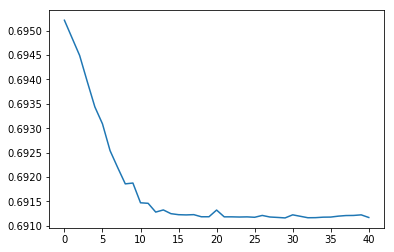

0.6774193548387096

In [0]:
plt.plot(clf.loss_curve_, label='learning curve')
plt.show()
accuracy_score(y_test, y_pred)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='tanh', max_iter=10000, alpha=0.0001,
                     solver='sgd', verbose=False,  random_state=21,tol=0.000000001)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
plt.show()
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
#confusion_mtx = confusion_matrix(np.argmax(y_test,axis=0), y_pred)
#plot_confusion_matrix(confusion_mtx, classes=labels.values(), normalize=True)
# y_test


array([[ 8,  2],
       [ 9, 12]])

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=False,  random_state=21,tol=0.000000001)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)



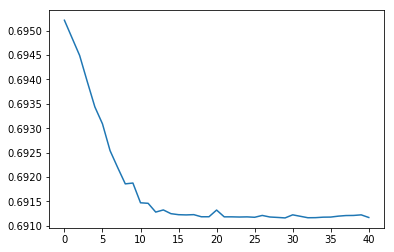

0.6774193548387096

In [0]:
plt.plot(clf.loss_curve_, label='learning curve')
plt.show()
accuracy_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# cm